<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/Copy_of_internal_1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
data=pd.read_csv('/content/day (1).csv')

In [ ]:
data2=pd.read_csv('/content/hour.csv')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df.shape

(731, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2012-12-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['dteday']=pd.to_datetime(df['dteday'])

In [ ]:
df['day_of_week'] = df['dteday'].dt.day_name() # extract week name from Date column
df["month"] = df['dteday'].dt.month_name()   # extract month name from Date column
df["year"] = df['dteday'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type

In [ ]:
df.drop(columns=['dteday'],inplace=True)

In [ ]:
df2=data.copy()
df2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df2.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
categorical_features.head()

,day_of_week,month,year
0,Saturday,January,2011
1,Sunday,January,2011
2,Monday,January,2011
3,Tuesday,January,2011
4,Wednesday,January,2011


In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  day_of_week
day_of_week
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: count, dtype: int64

 
column name  :  month
month
January      62
March        62
July         62
May          62
December     62
October      62
August       62
April        60
September    60
June         60
November     60
February     57
Name: count, dtype: int64

 
column name  :  year
year
2012    366
2011    365
Name: count, dtype: int64


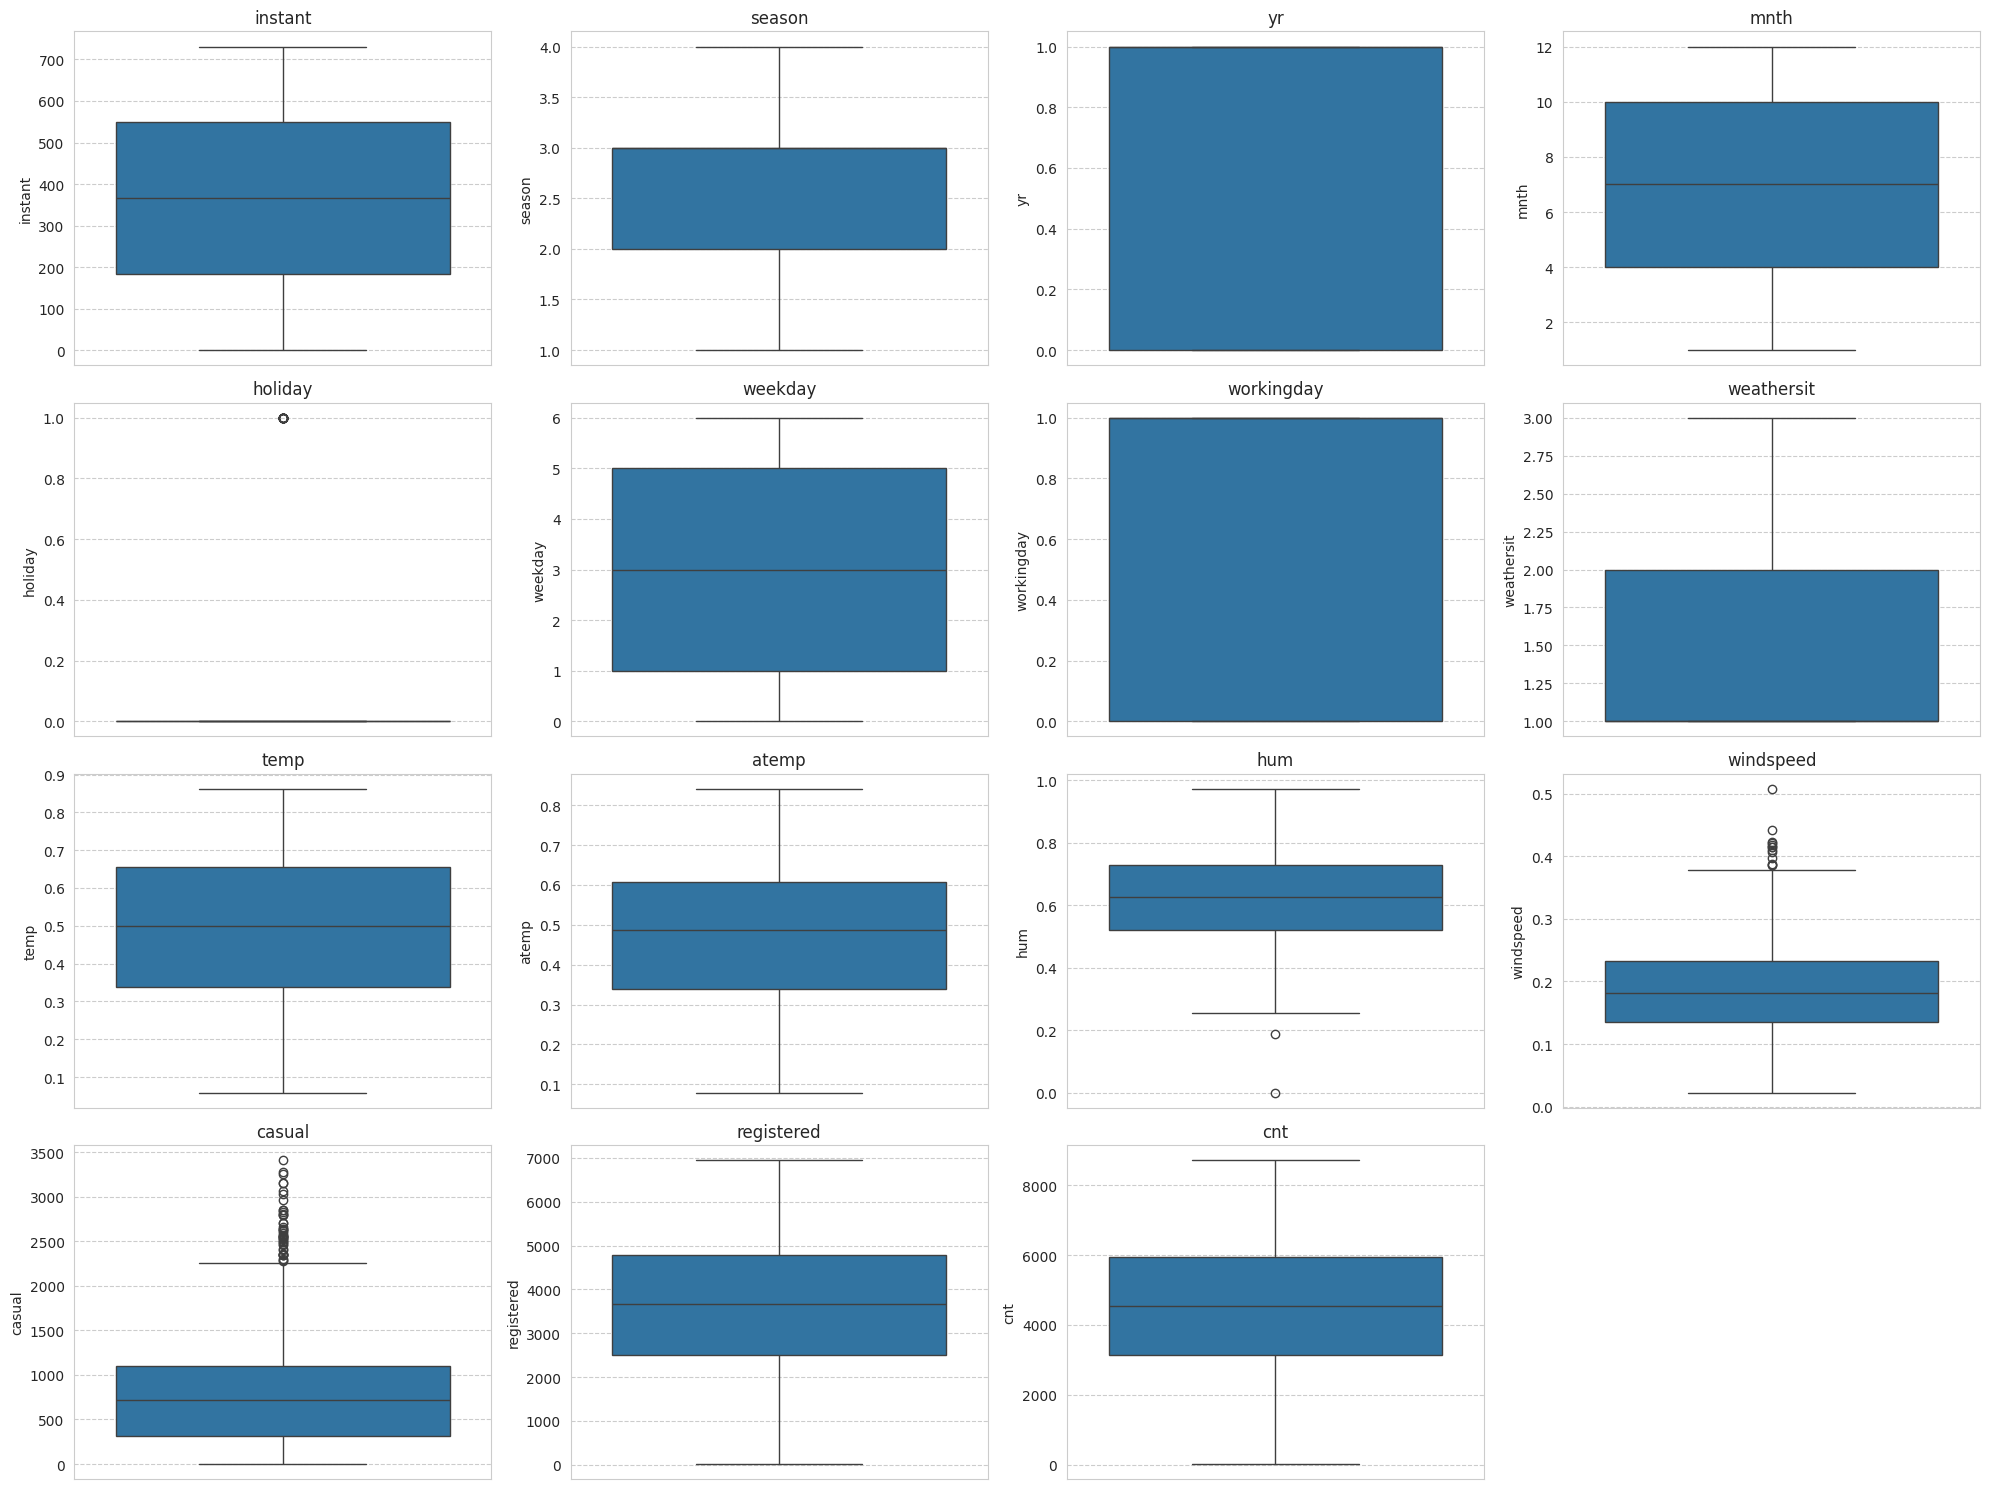

In [ ]:
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

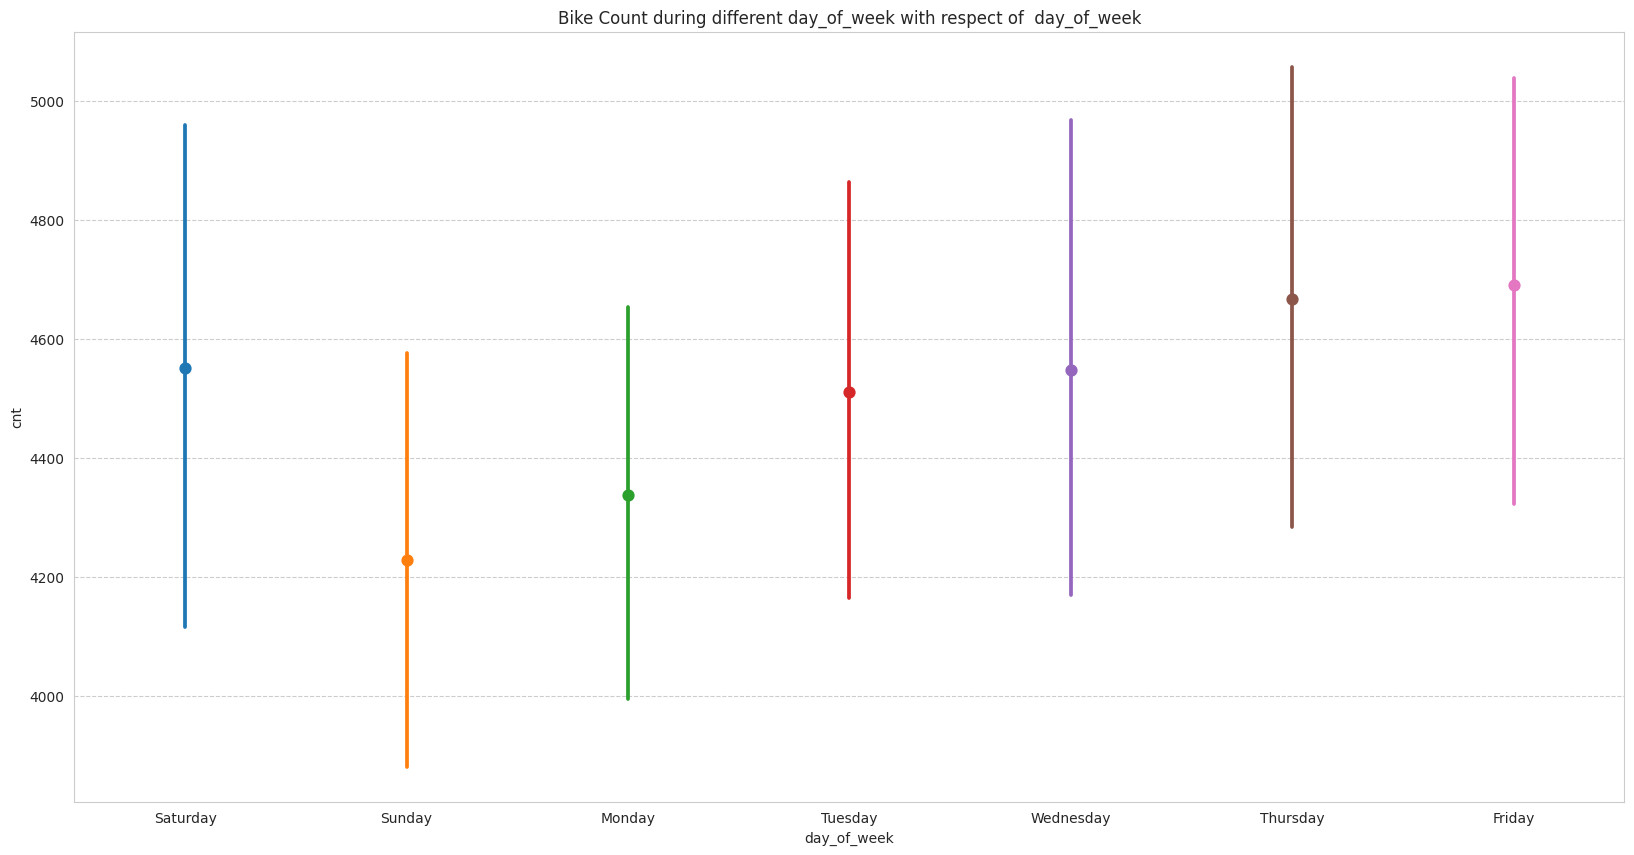

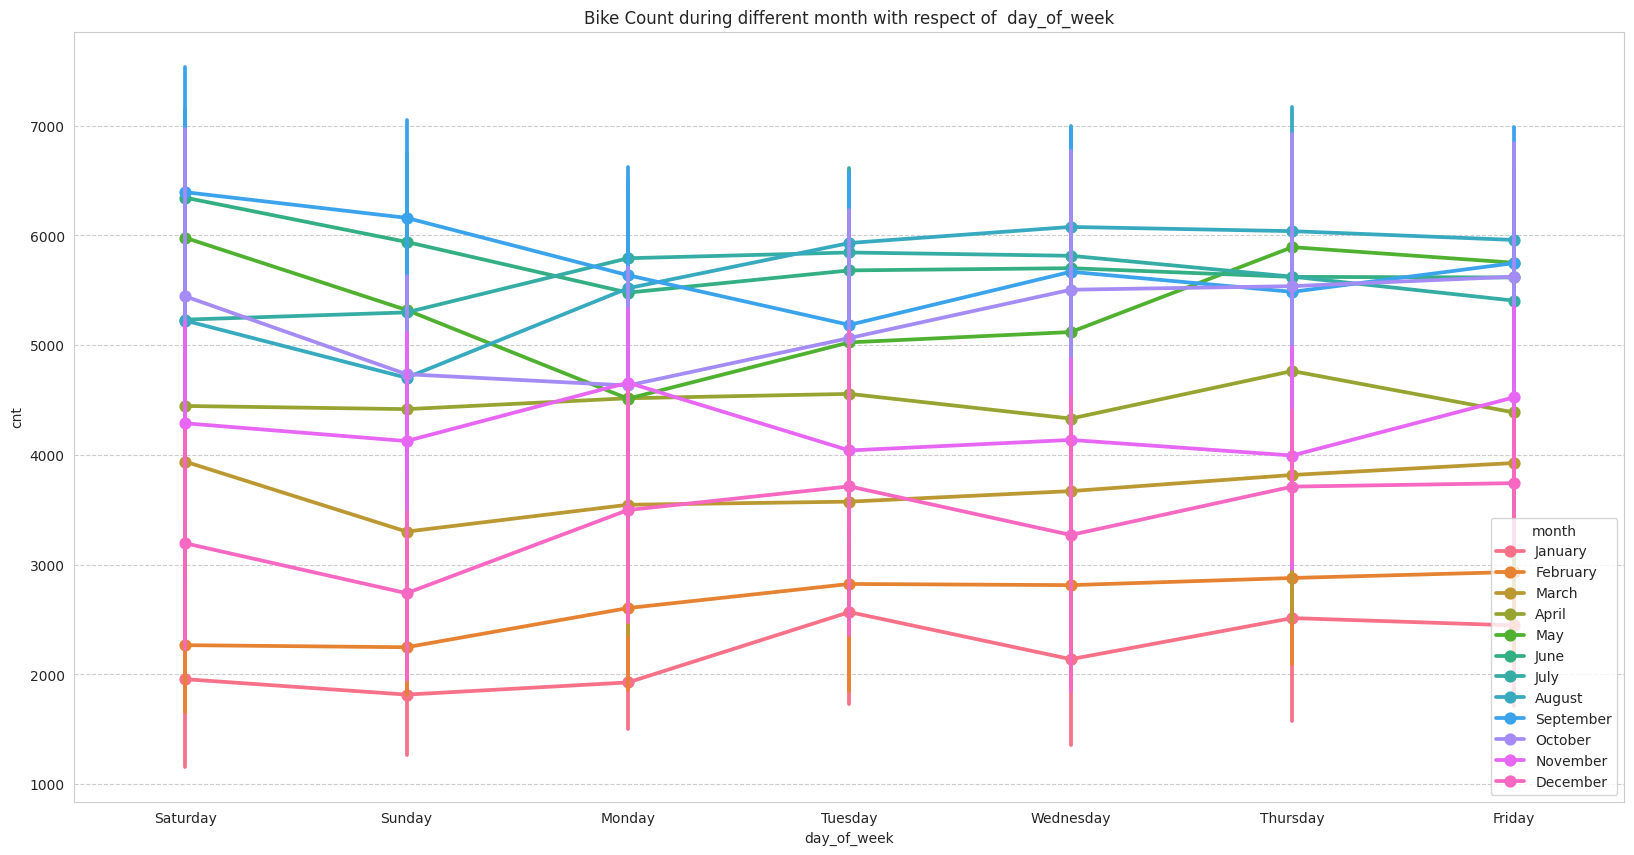

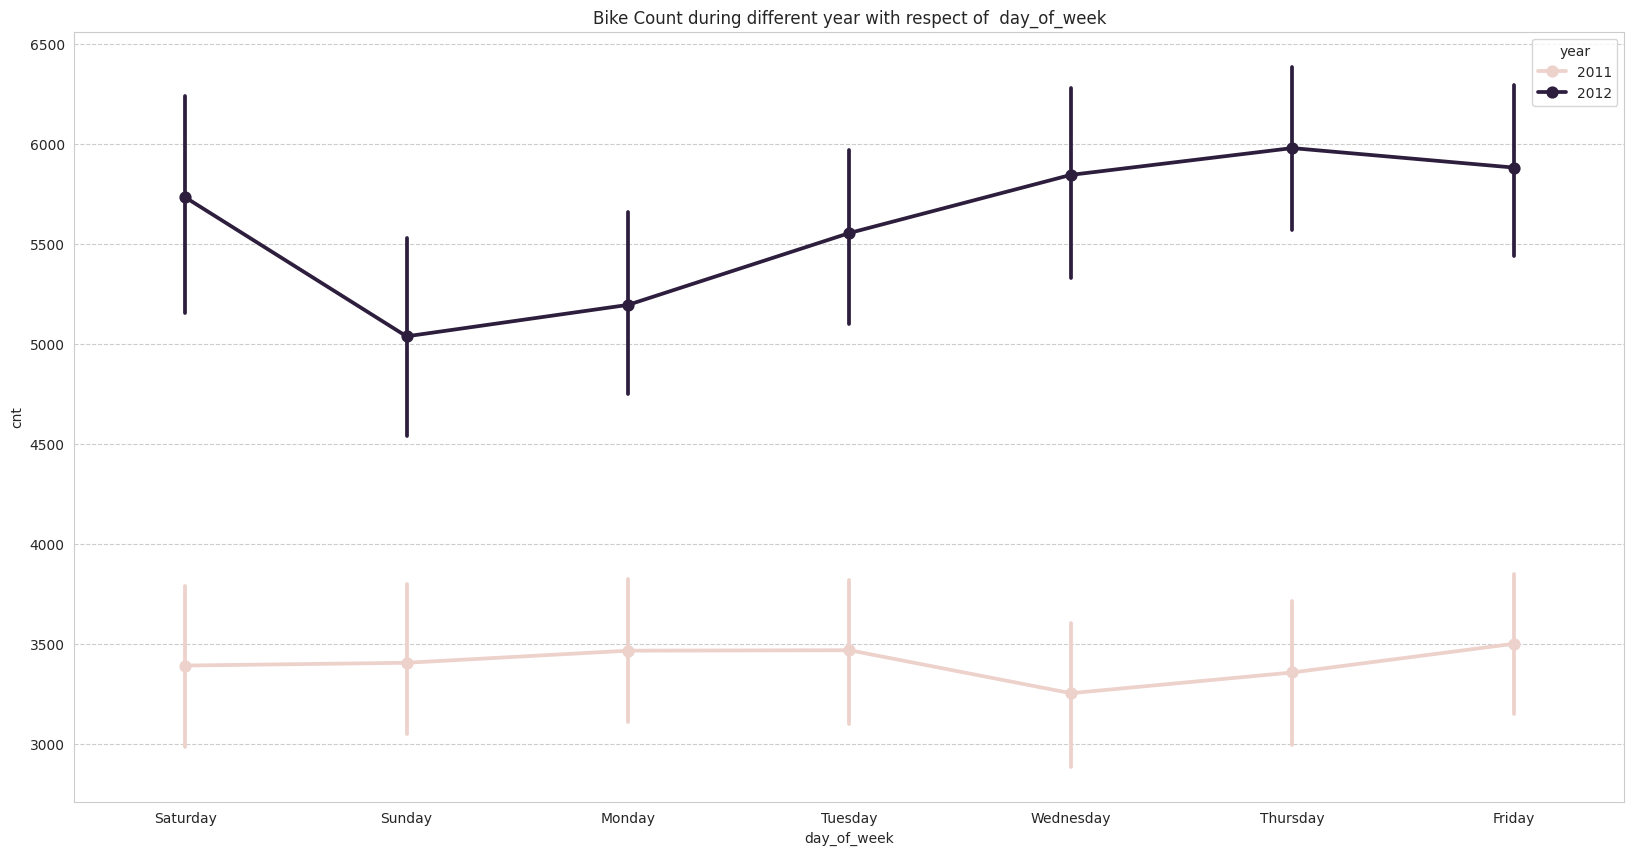

In [ ]:
for i in categorical_features.columns:
  plt.figure(figsize=(20,10))
  sns.pointplot(x=df["day_of_week"],y=df['cnt'],hue=df[i])
  plt.title(f"Bike Count during different {i} with respect of  day_of_week")
  plt.show()

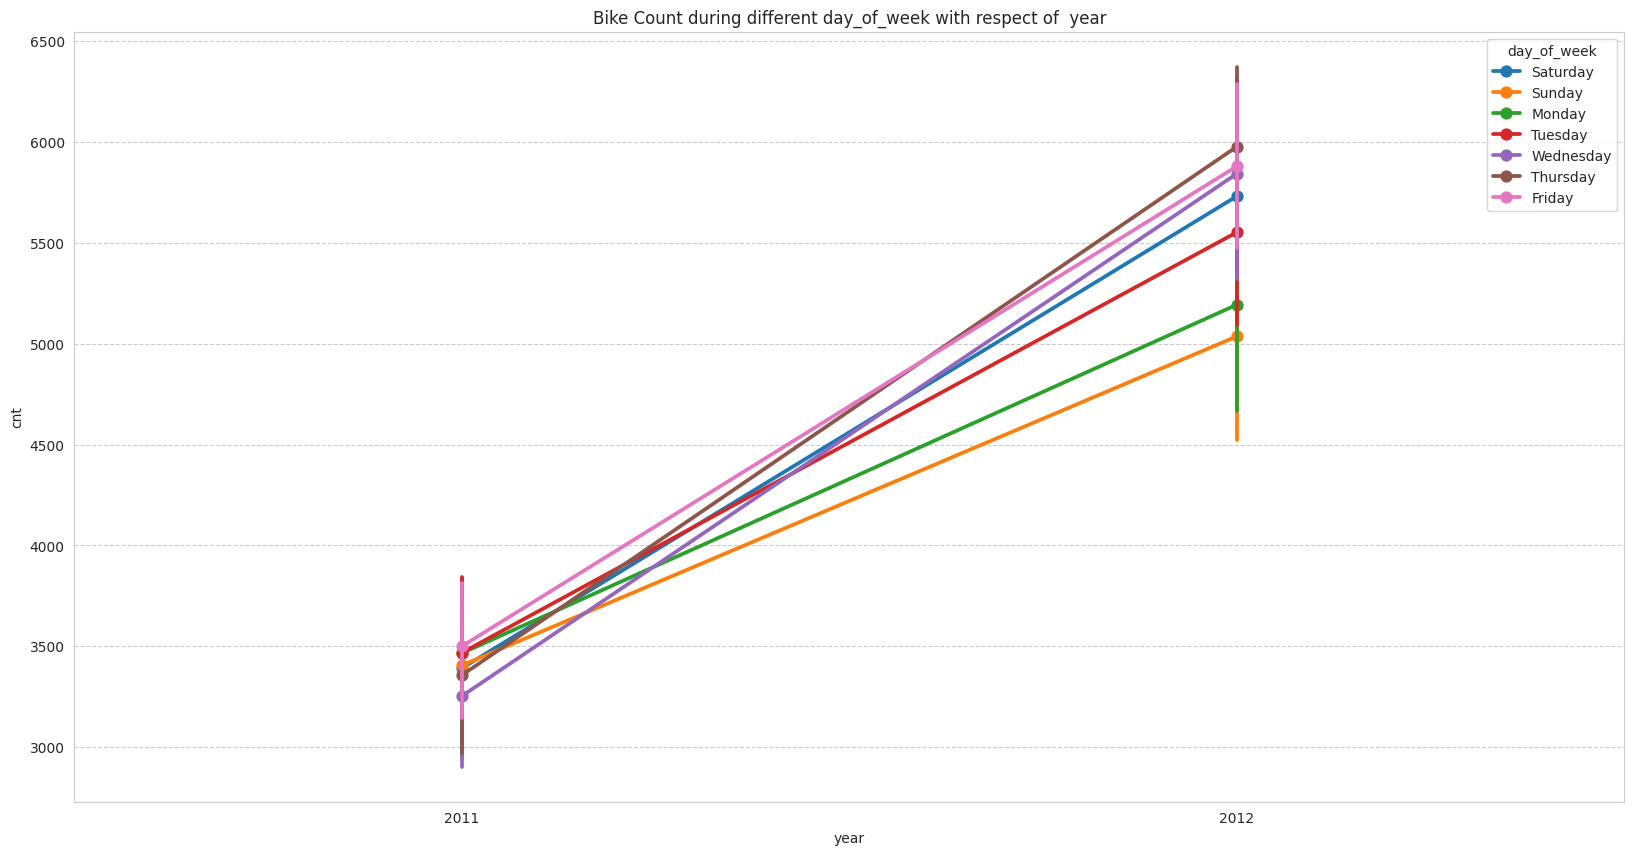

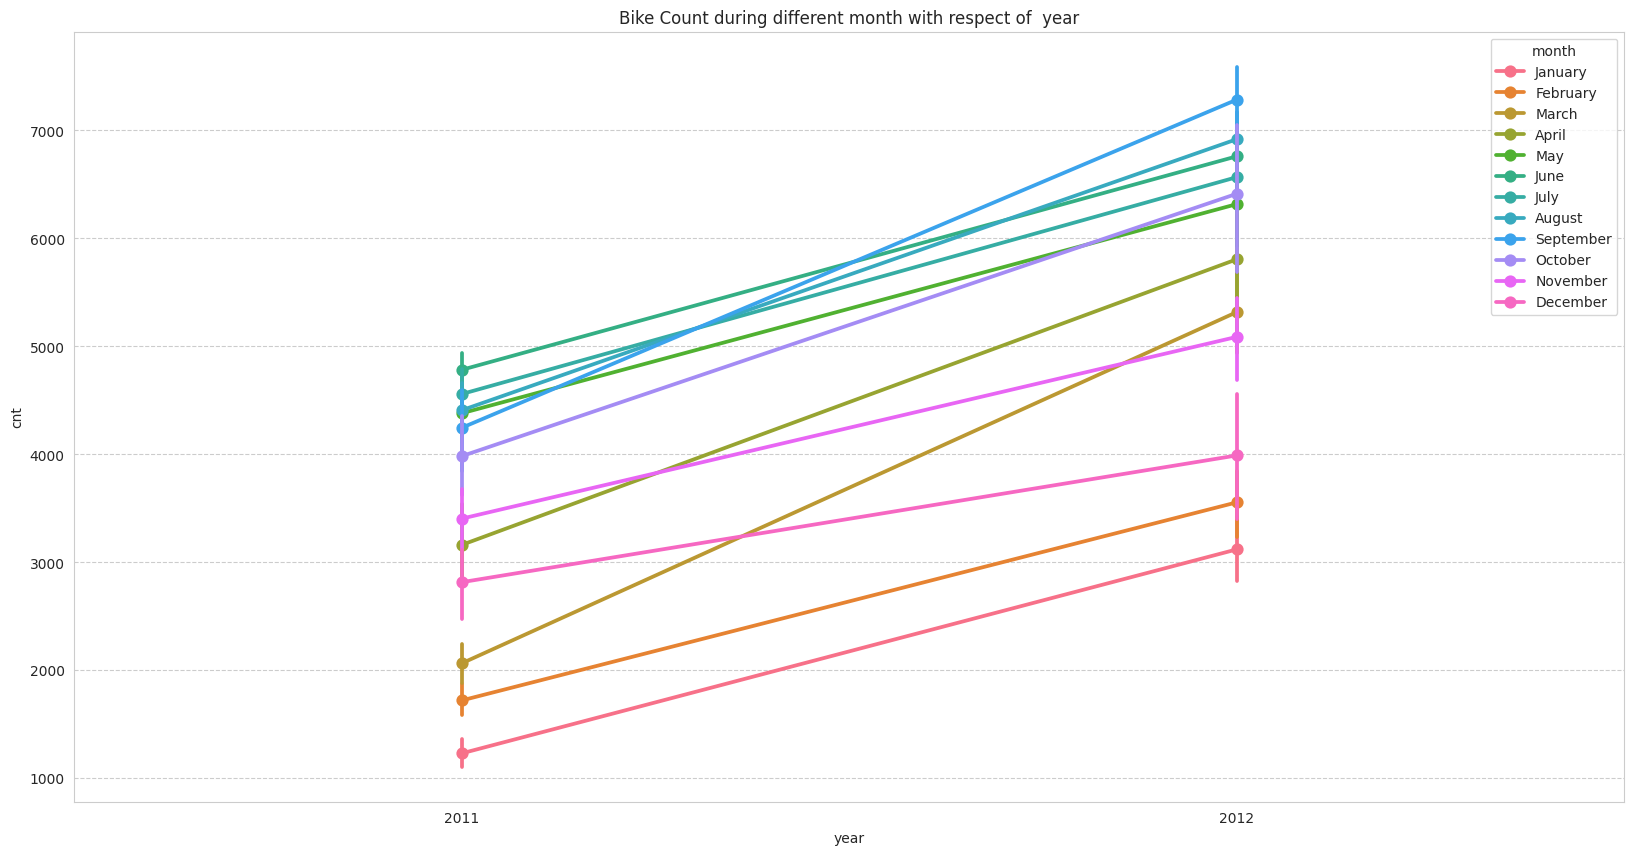

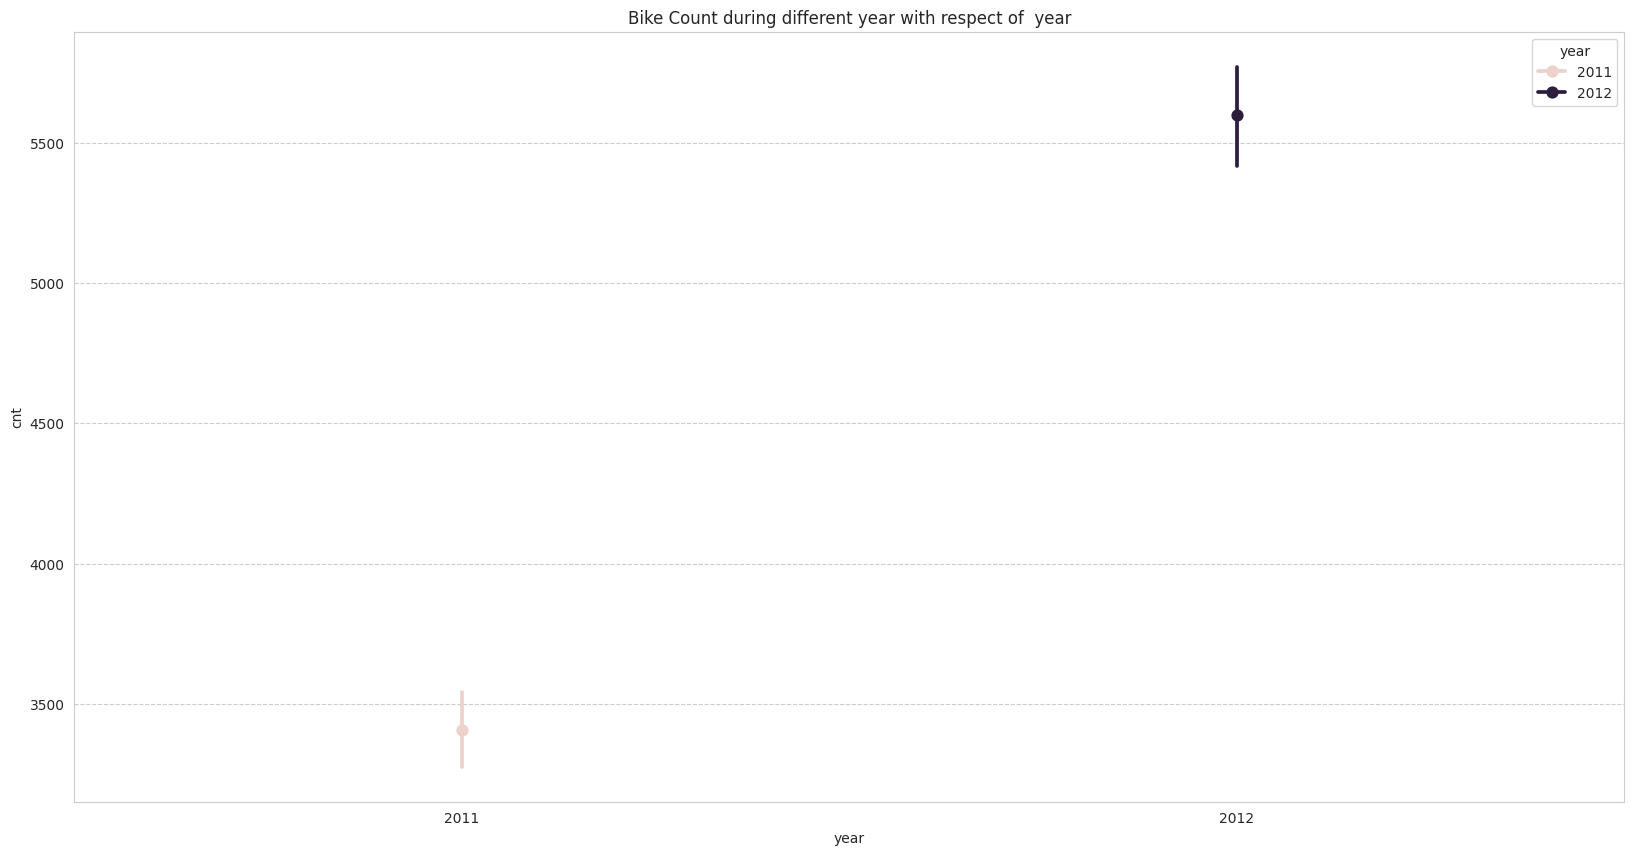

In [ ]:
for i in categorical_features.columns:
  plt.figure(figsize=(20,10))
  sns.pointplot(x=df["year"],y=df['cnt'],hue=df[i])
  plt.title(f"Bike Count during different {i} with respect of  year")
  plt.show()

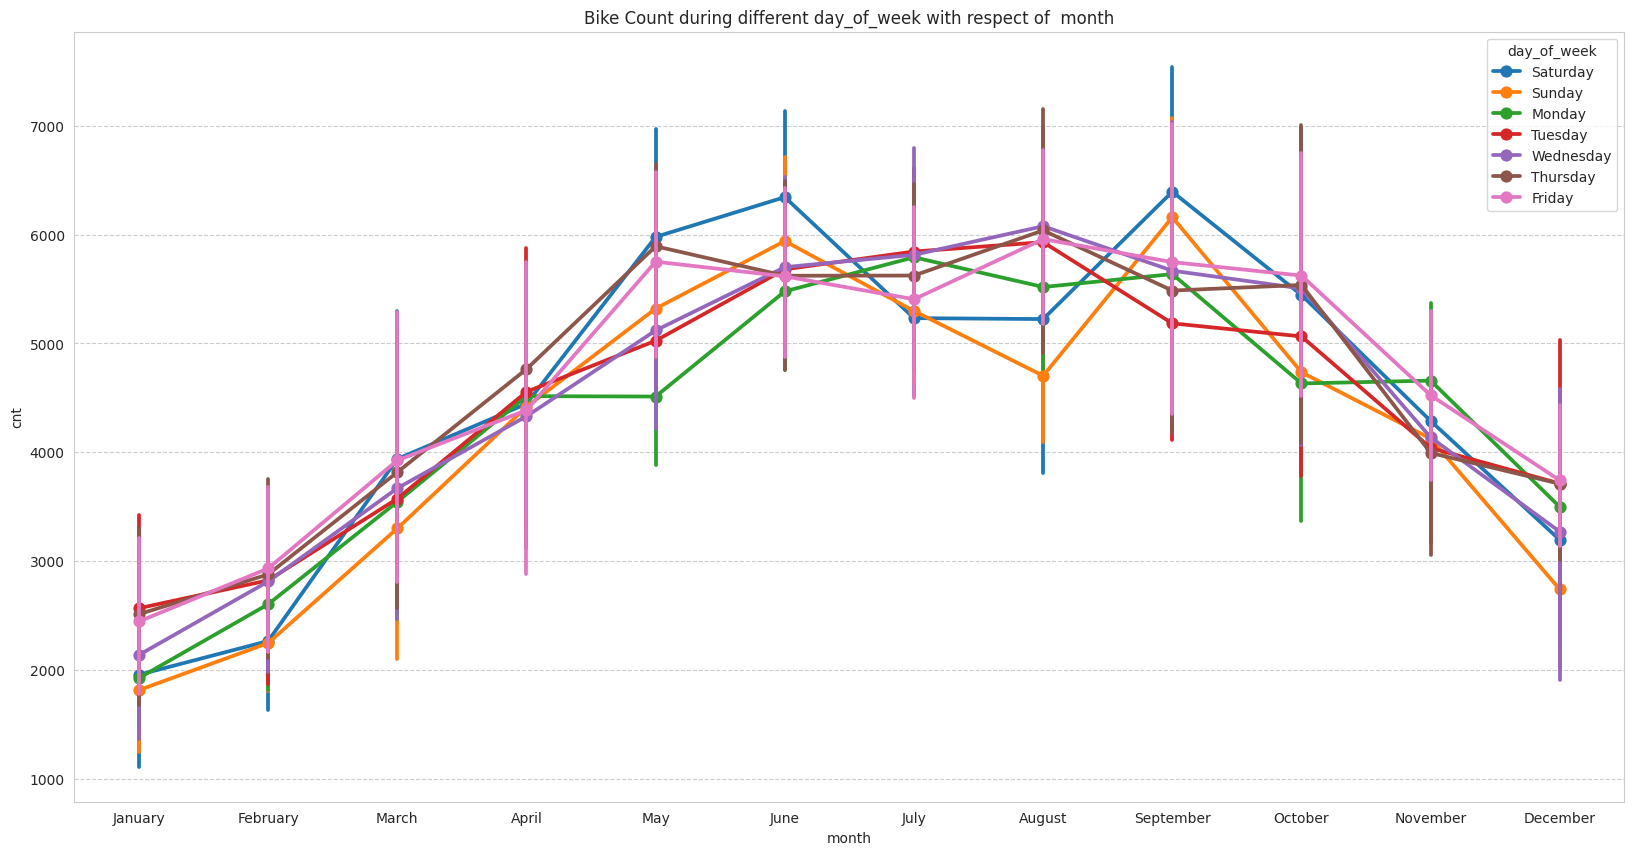

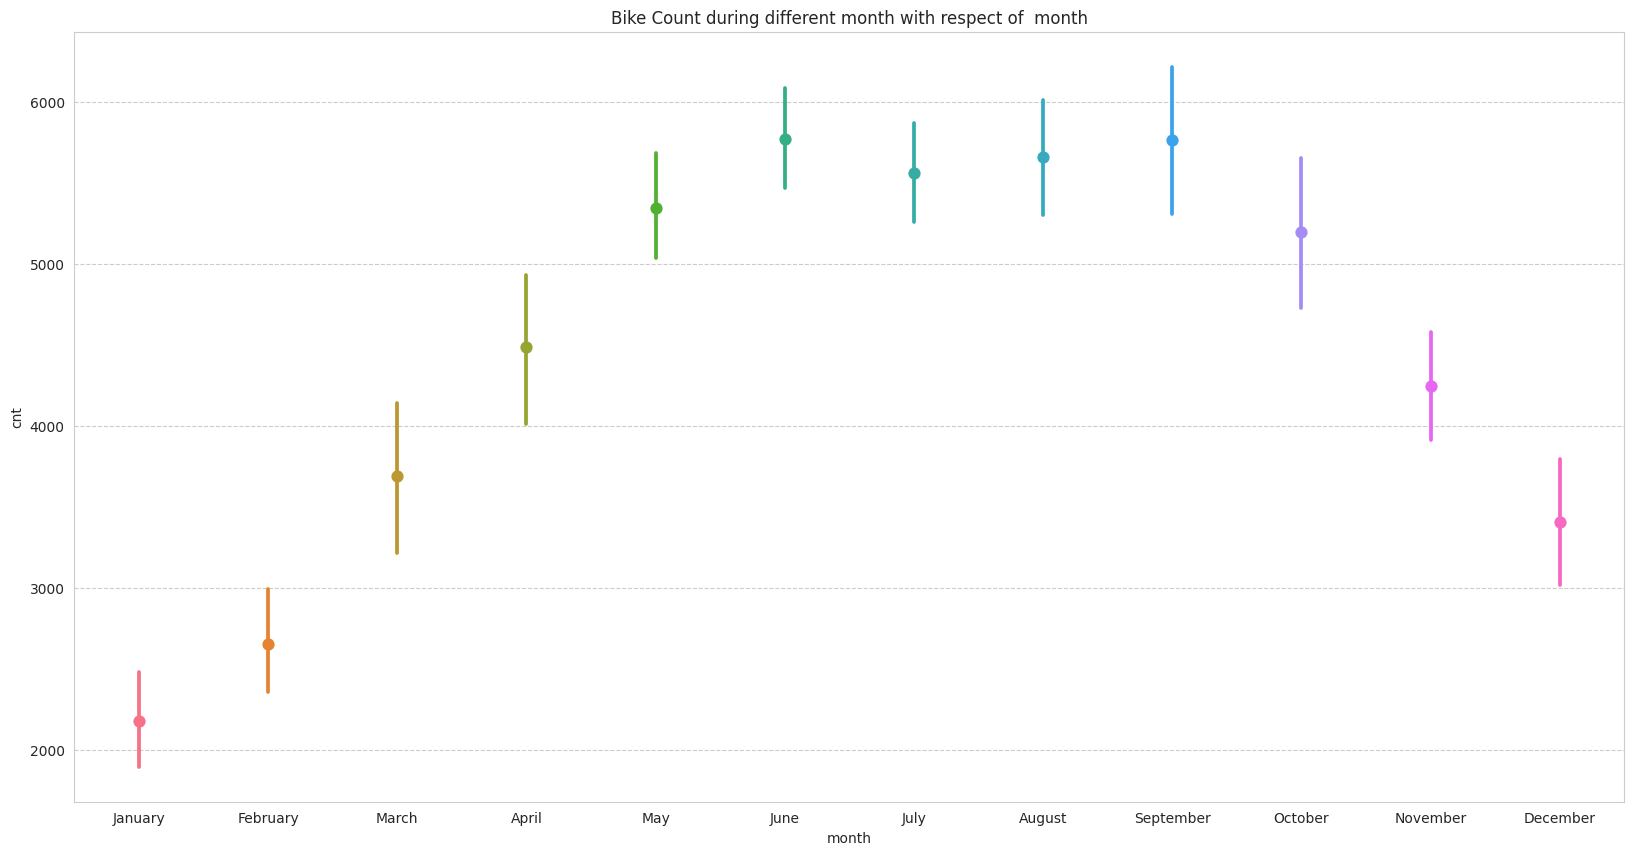

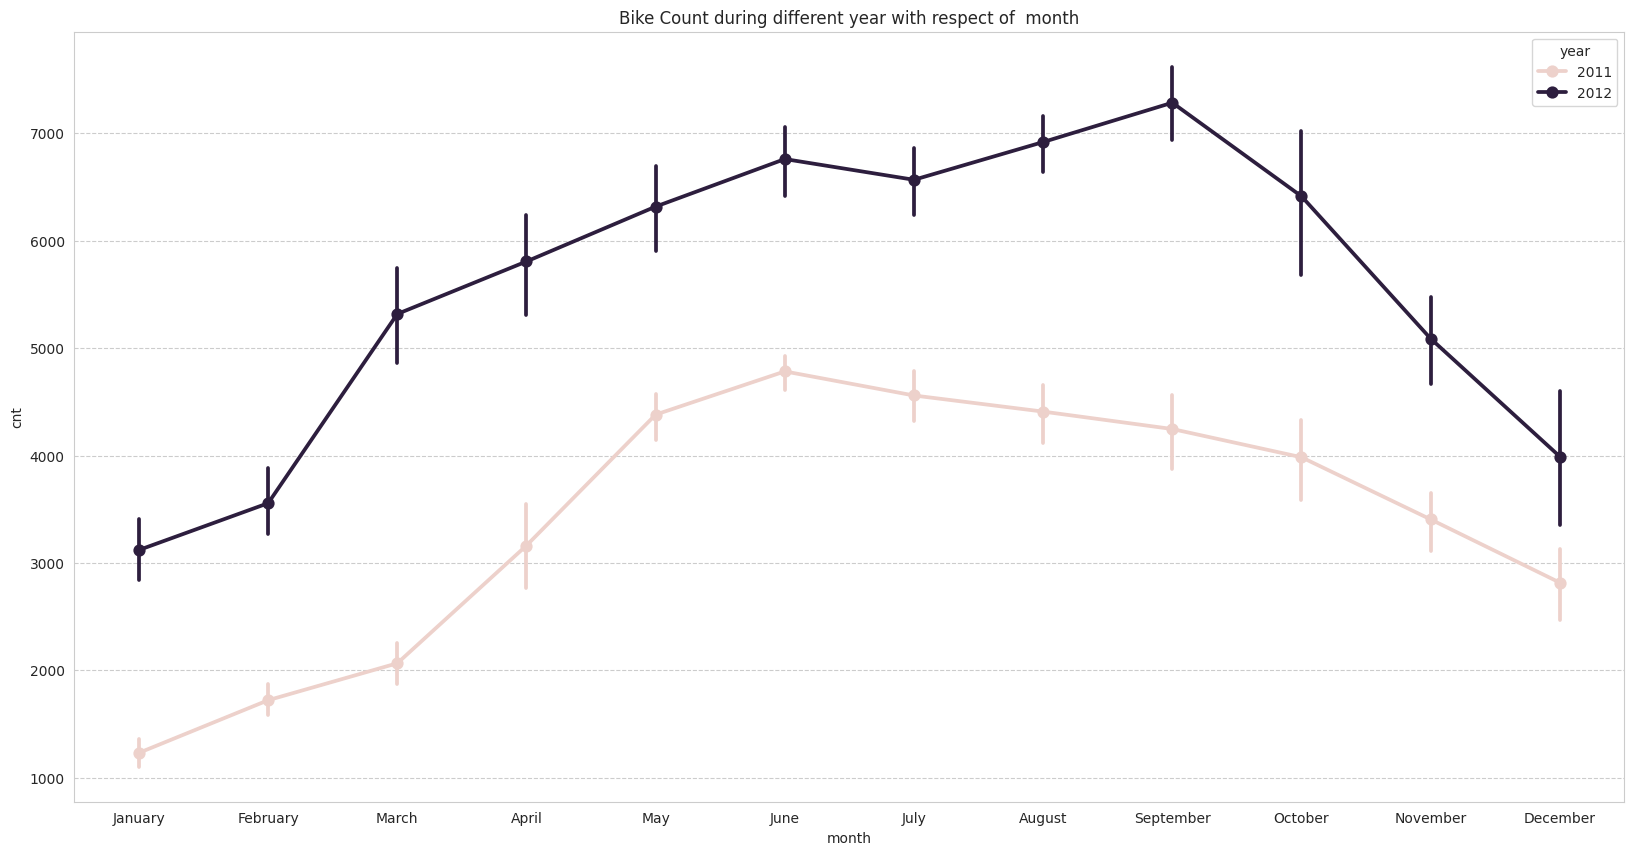

In [ ]:
for i in categorical_features.columns:
  plt.figure(figsize=(20,10))
  sns.pointplot(x=df["month"],y=df['cnt'],hue=df[i])
  plt.title(f"Bike Count during different {i} with respect of  month")
  plt.show()

In [ ]:
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
df.week.value_counts()

,count
week,
Weekdays,521
Weekend,210


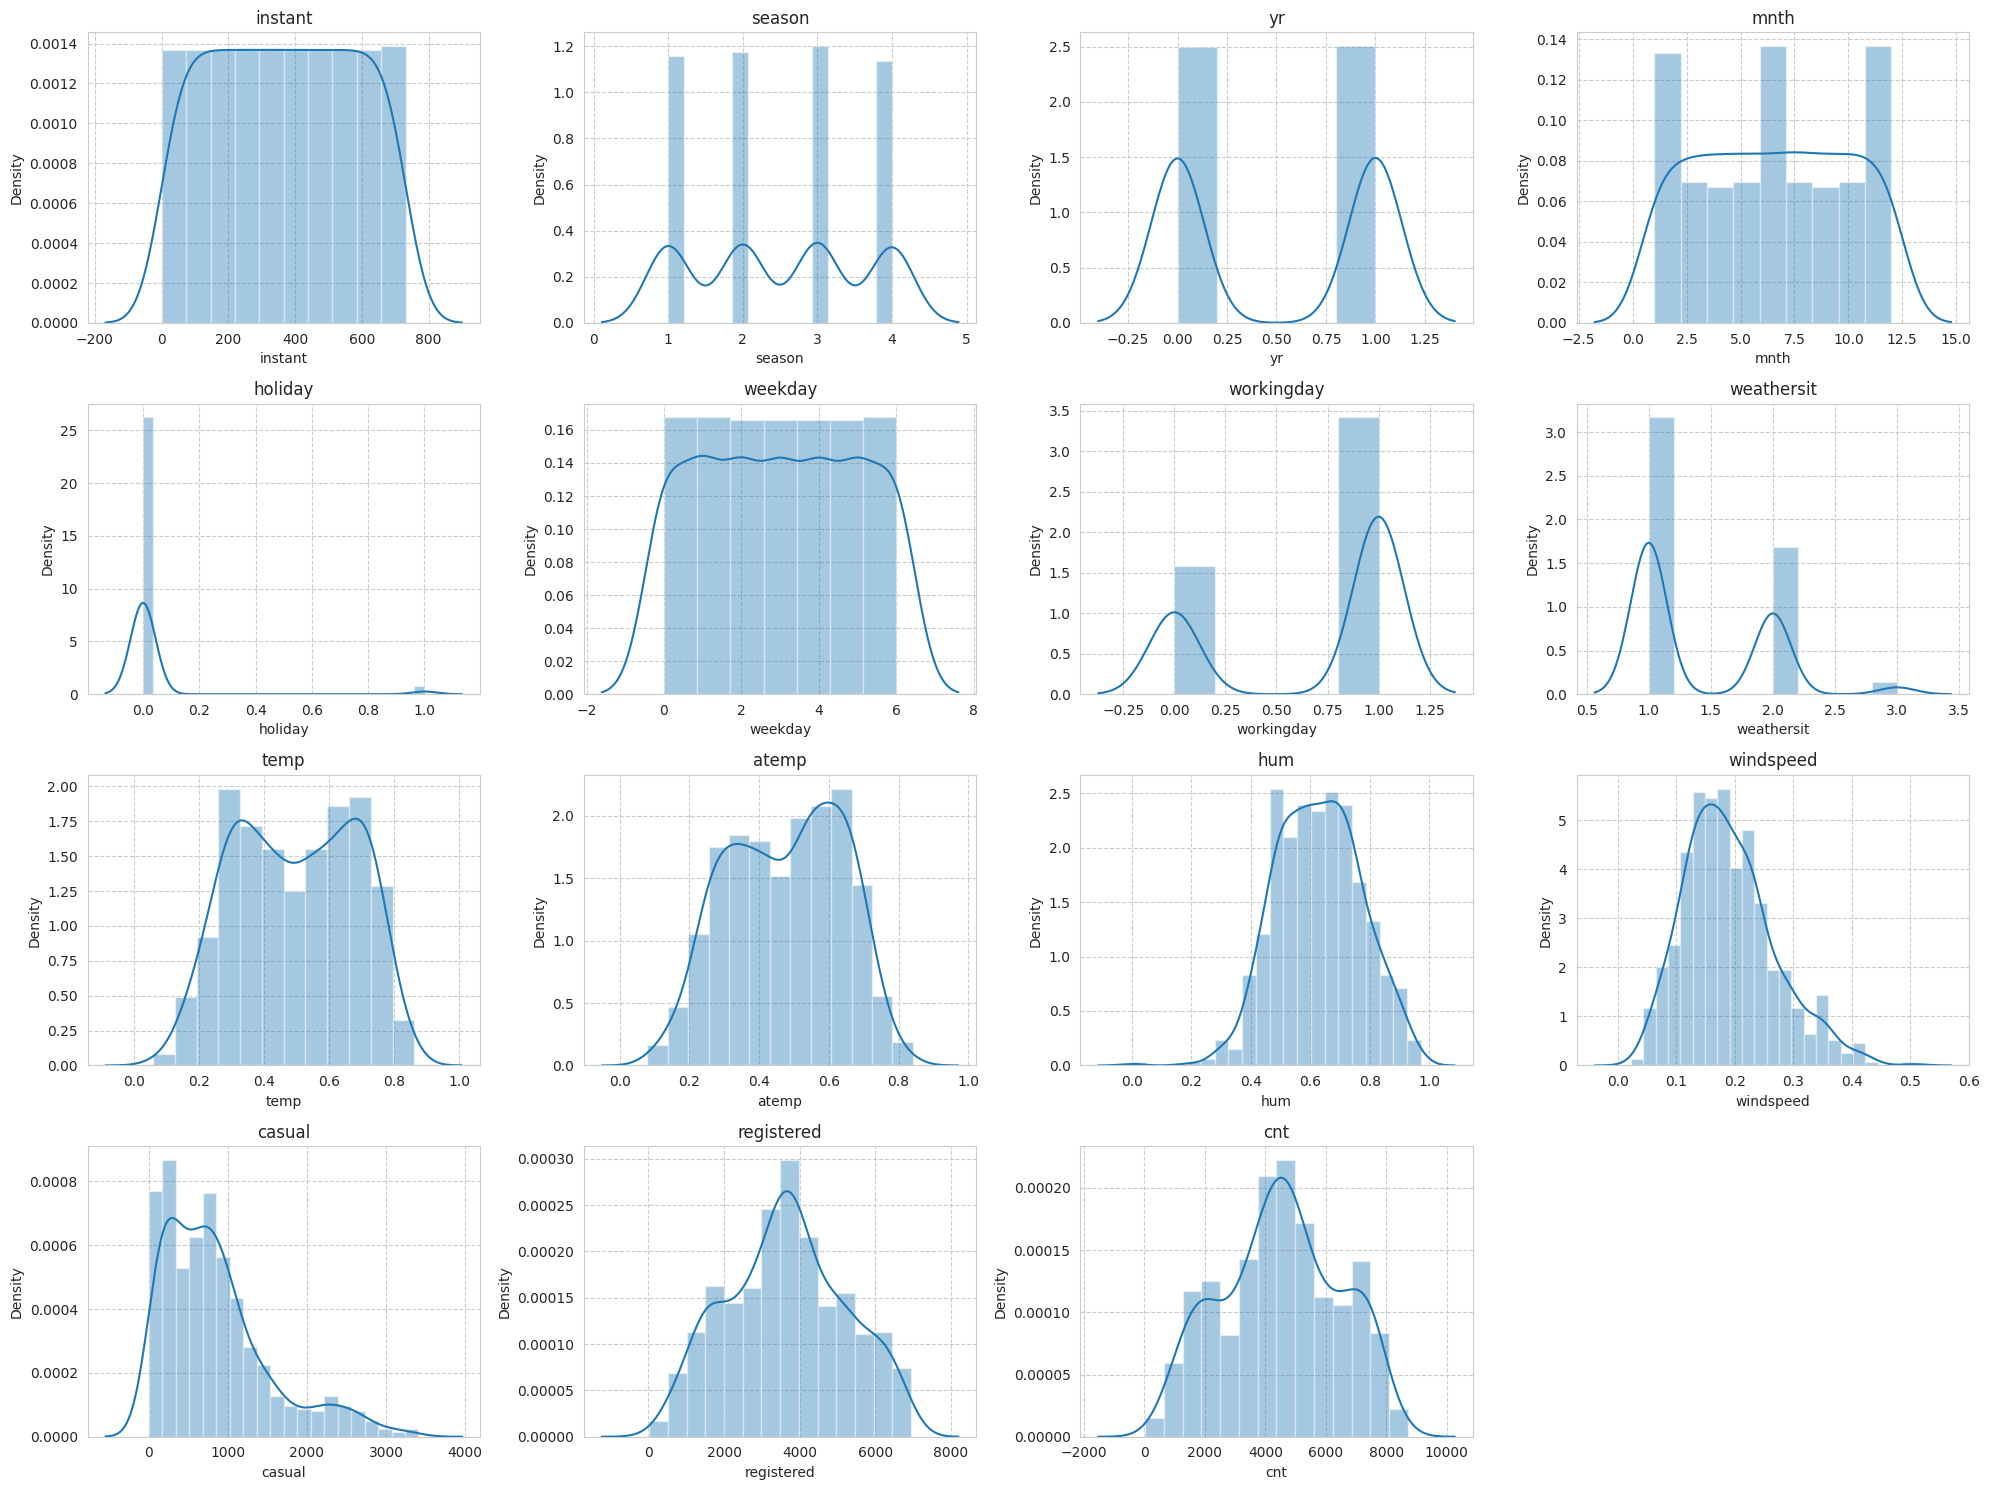

In [ ]:
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

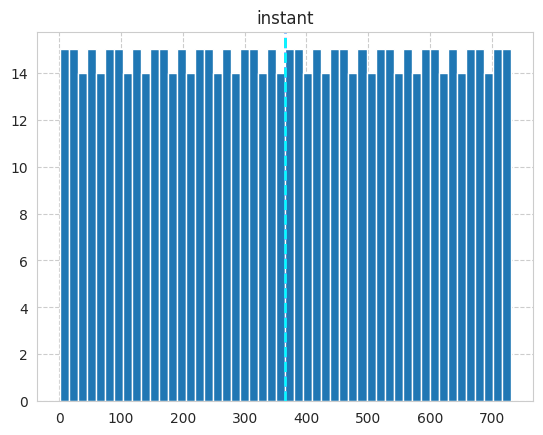

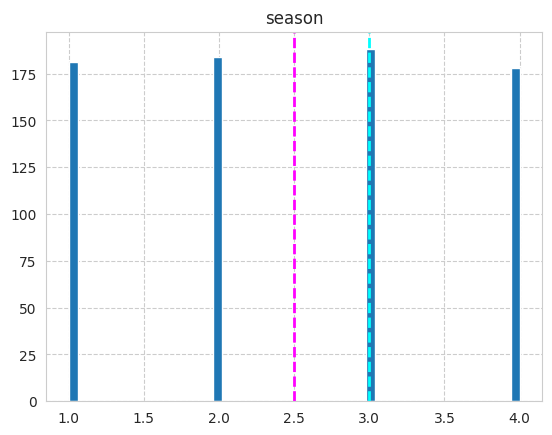

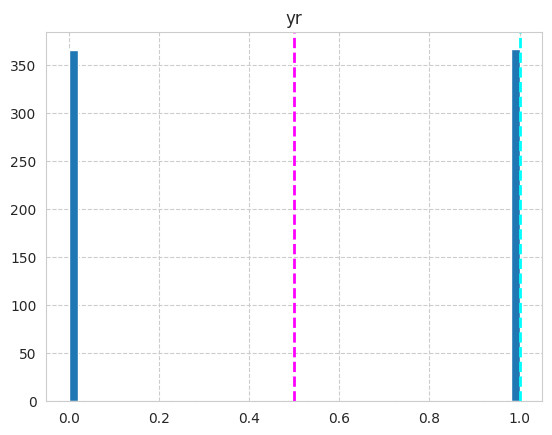

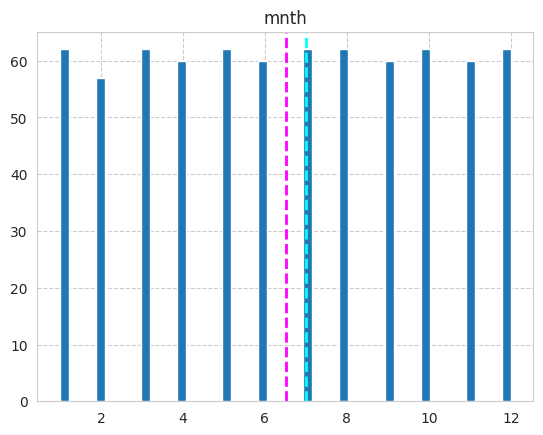

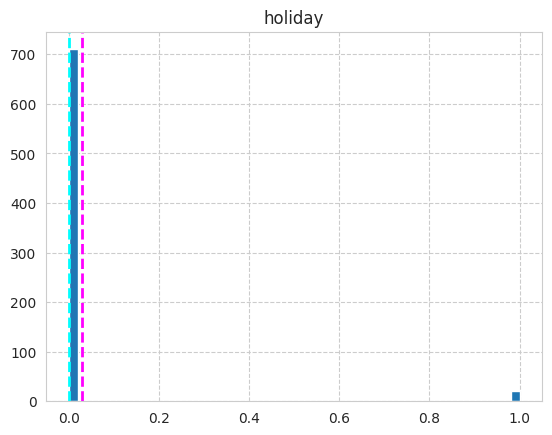

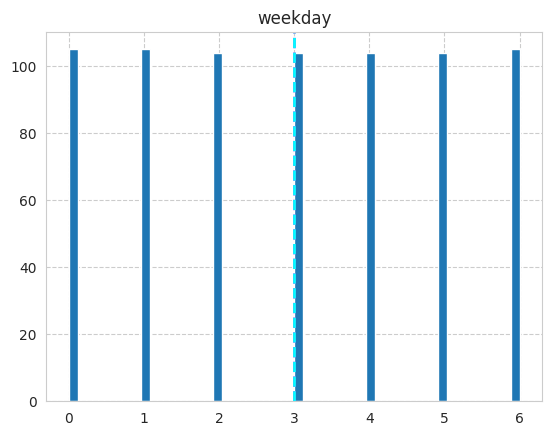

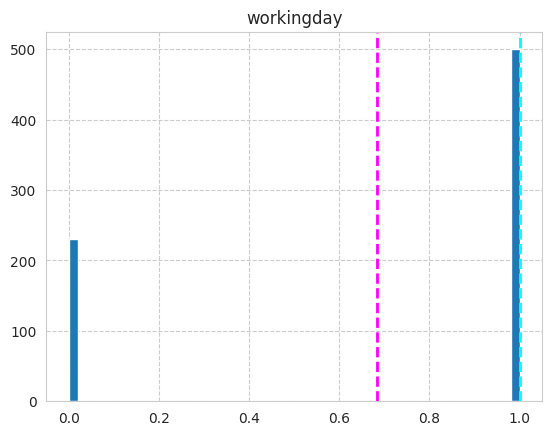

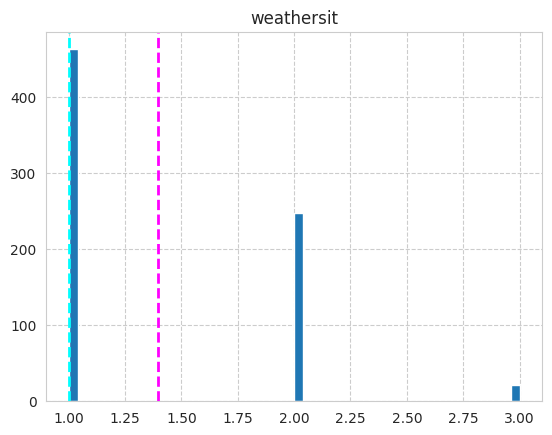

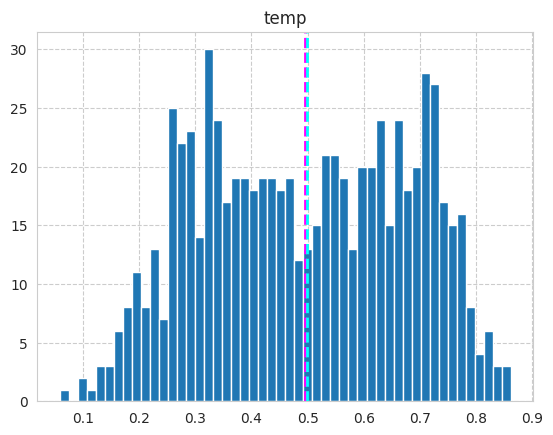

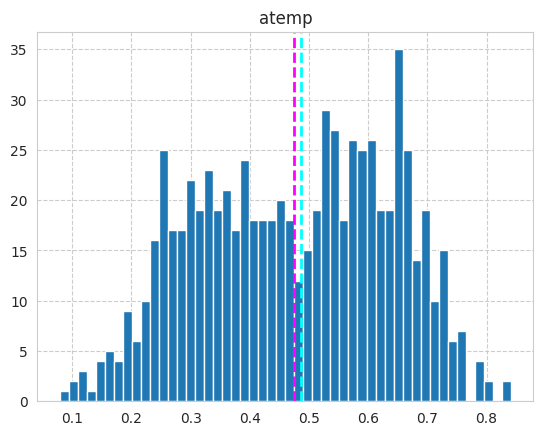

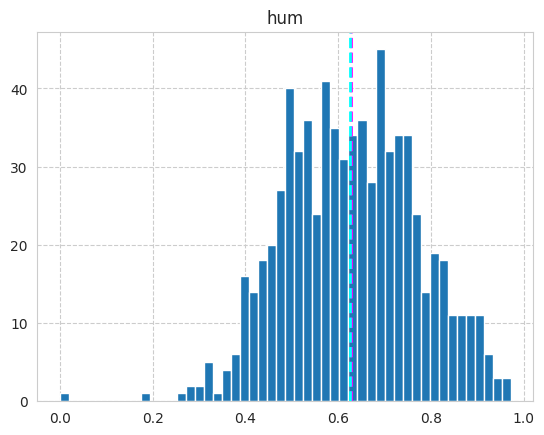

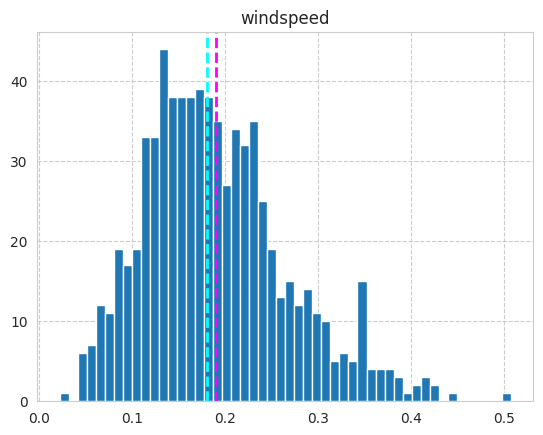

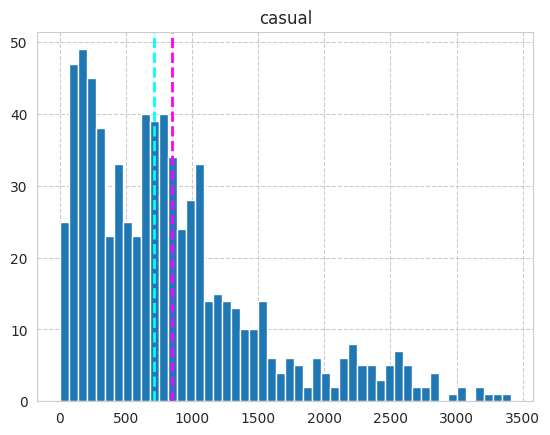

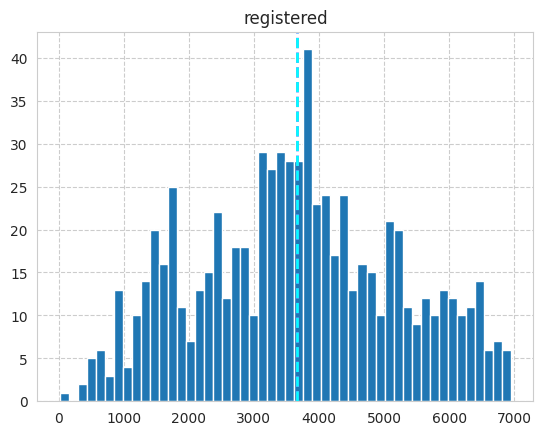

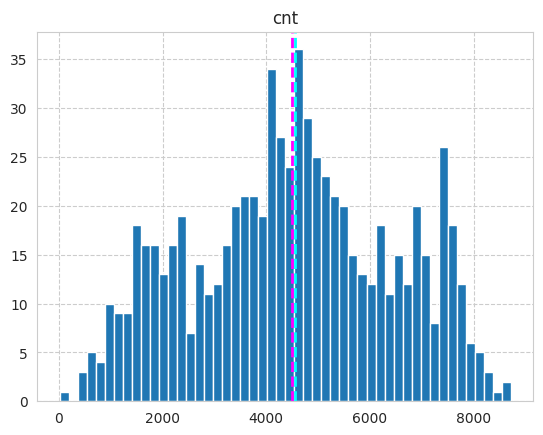

In [ ]:
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

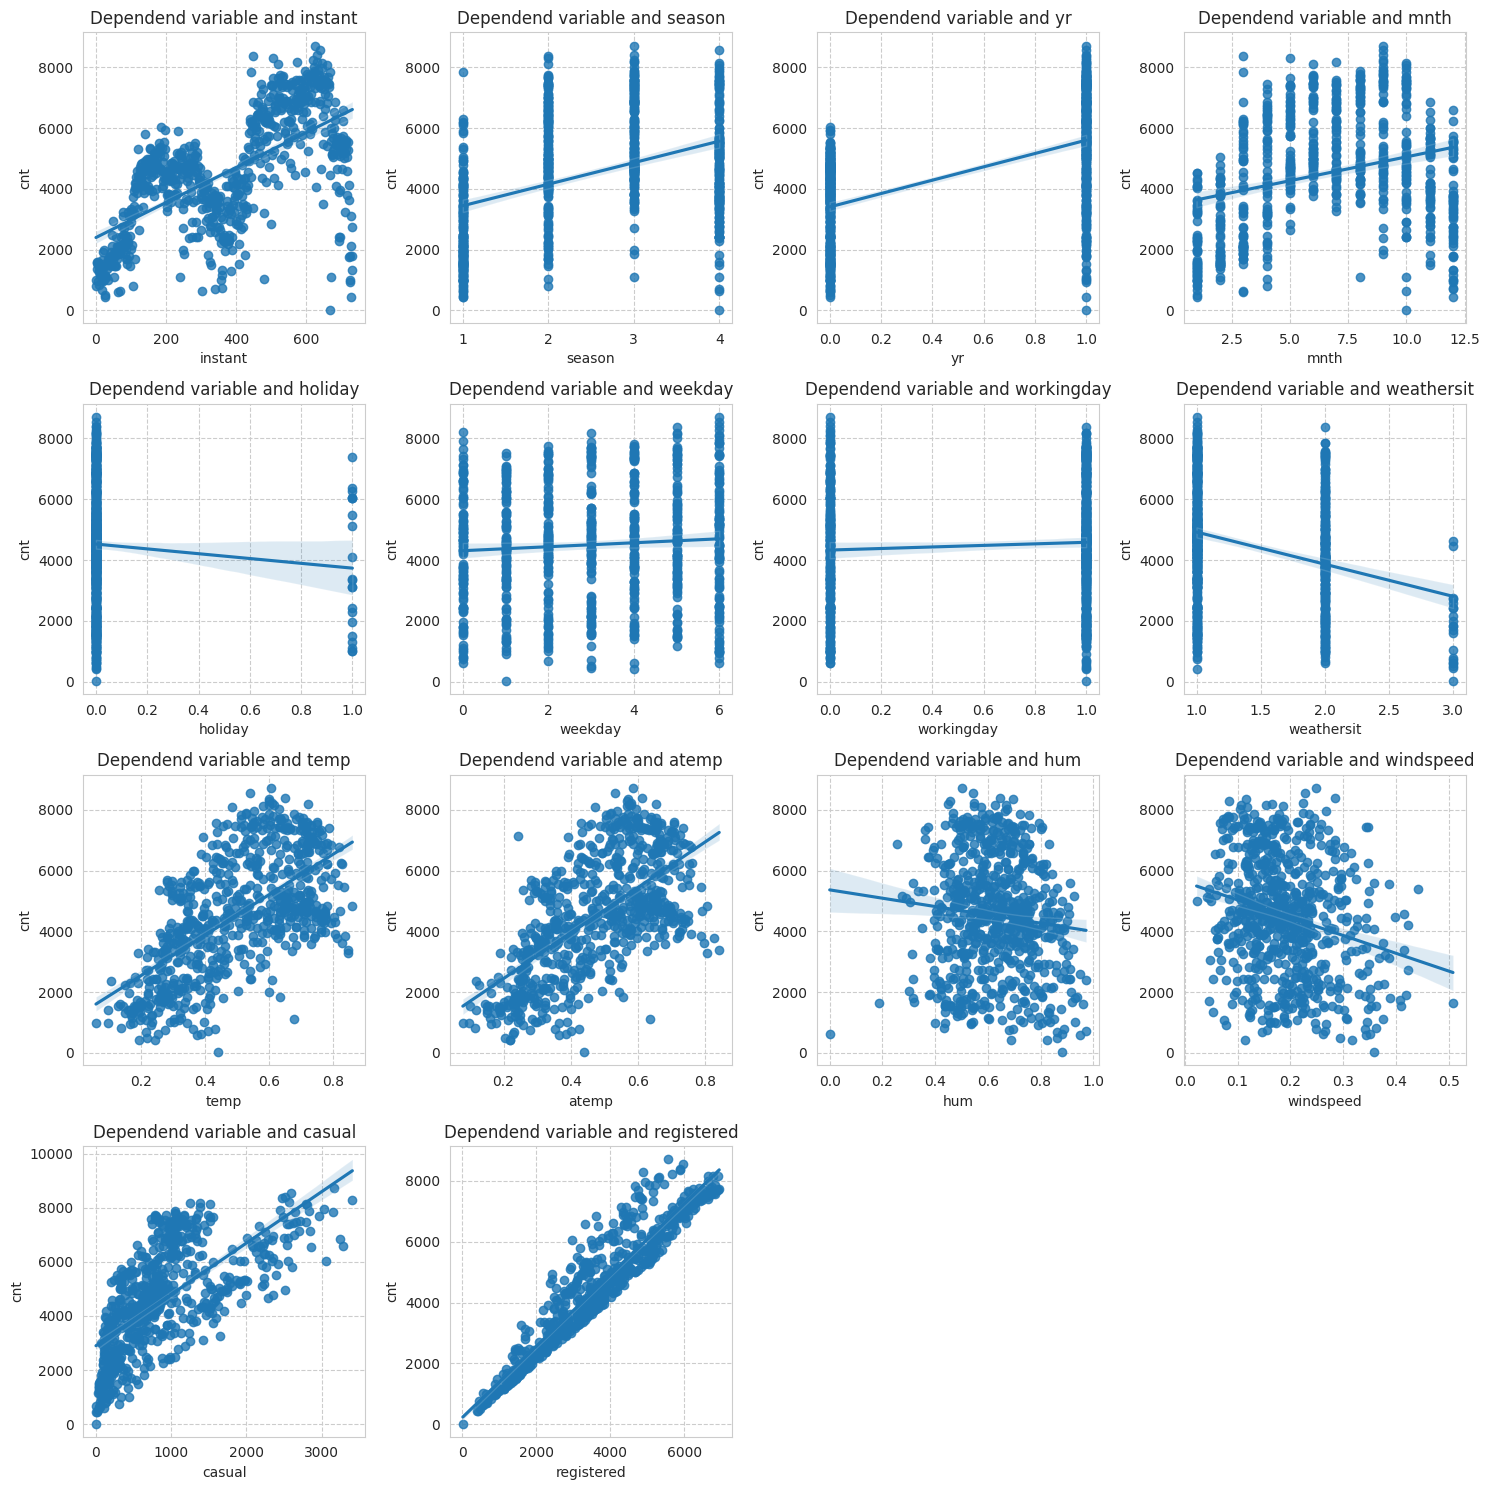

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_numeric = df.select_dtypes(include=np.number)
n=1
plt.figure(figsize=(15,15))
numeric_cols_to_plot = [col for col in df_numeric.columns if col != 'cnt']
for i in numeric_cols_to_plot:
    plt.subplot(4,4,n)
    n+=1
    sns.regplot(x=df[i],y=df['cnt'])
    df_numeric = df.select_dtypes(include=np.number)
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [ ]:
#correlation with Rented Bike Count
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr()['registered']

,registered
instant,0.659623
season,0.411623
yr,0.594248
mnth,0.293488
holiday,-0.108745
weekday,0.057367
workingday,0.303907
weathersit,-0.260388
temp,0.540012
atemp,0.544192


<Axes: >

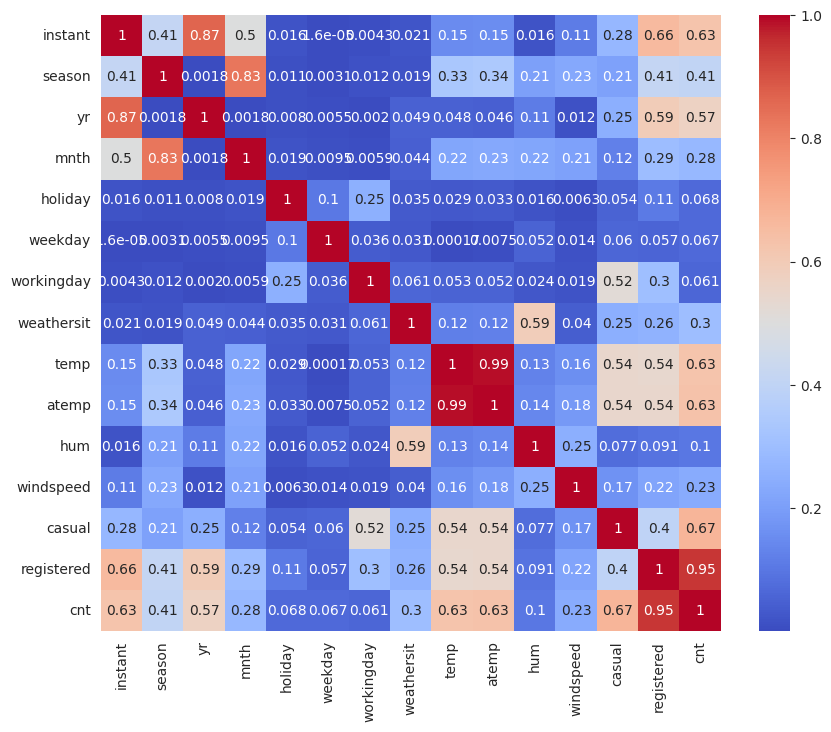

In [ ]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(abs(numeric_df.corr()), cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Square root')

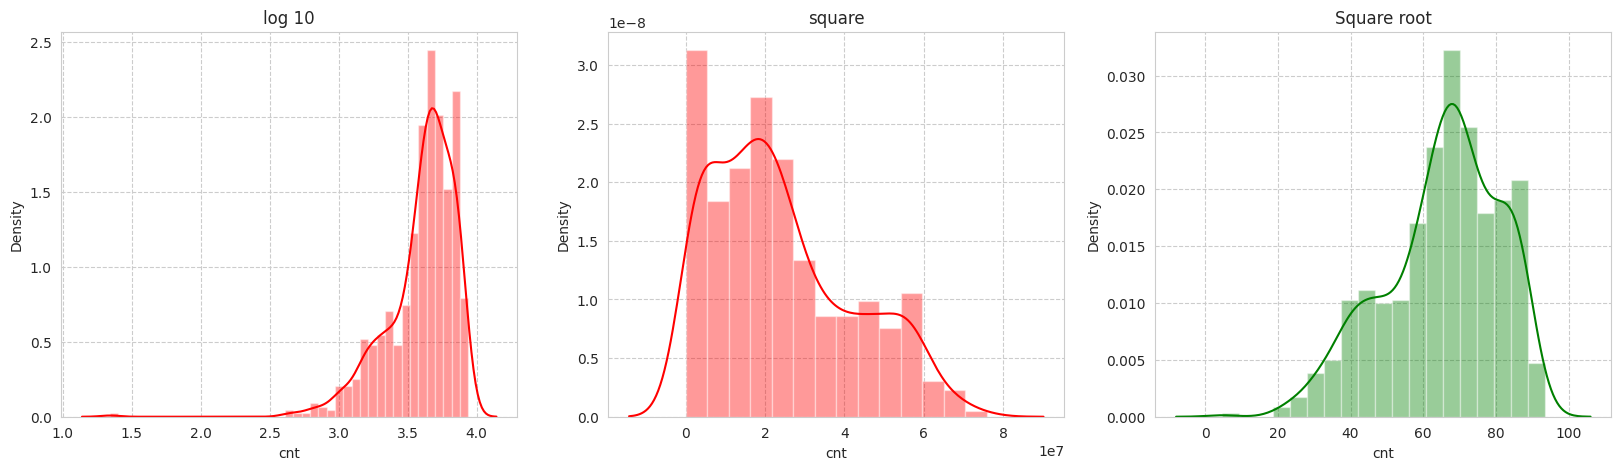

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df2['cnt']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df2['cnt']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(df2['cnt']),ax=axes[2], color='green').set_title("Square root")

In [ ]:
X = df2.drop(columns='cnt')
y = np.sqrt(df2['cnt'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
X_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
688,689,2012-11-19,4,1,11,0,1,1,2,0.380833,0.375621,0.623333,0.235067,449,5050
649,650,2012-10-11,4,1,10,0,4,1,1,0.435000,0.431167,0.463333,0.181596,834,6736
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147


In [ ]:
X_test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693


In [ ]:
y_train.head()

,cnt
688,74.155243
649,87.005747
637,92.493243
525,86.590993
367,47.286362


In [ ]:
y_test.head()

,cnt
703,81.277303
33,39.370039
300,61.212744
456,77.723870
633,86.821656


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548, 15), (183, 15), (548,), (183,))

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))


In [ ]:
# Fitting the model
regression = LinearRegression()
X_train = X_train.drop(columns=['dteday'])
X_test = X_test.drop(columns=['dteday'])
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:

regression.score(X_train,y_train)

0.9801394454473792

In [ ]:
reg_pred = regression.predict(X_test)

In [ ]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 194.89754074311818
mean squared error is  : 67939.05754346243
Root mean squared error is  : 260.6512181891012
R2 score is  : 0.9823715048313871


In [ ]:
 regression.coef_

array([-2.18365604e-02,  5.71570786e-01,  7.73374167e+00,  6.10752436e-01,
       -3.01158392e-01, -6.97539482e-02,  8.56904108e-02, -5.19652725e-01,
       -1.54969796e+01,  2.16532340e+01, -2.87600453e-01,  2.22787008e-01,
        7.23323938e-03,  7.80525010e-03])

In [ ]:
regression.intercept_

np.float64(27.711034503487433)

In [ ]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.9800355474934952

In [ ]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 193.03054766492505
mean squared error is  : 62333.346916508075
Root mean squared error is  : 249.6664713502958
R2 score is  : 0.9838260472739385


In [ ]:
L1.coef_

array([-1.48942986e-02,  5.74638616e-01,  5.14960827e+00,  3.98978869e-01,
       -2.97014059e-01, -7.31795610e-02,  7.85021407e-02, -5.46500428e-01,
       -5.77839208e+00,  1.04914329e+01, -2.36993628e-02, -0.00000000e+00,
        7.25633379e-03,  7.83336275e-03])

In [ ]:
L1.intercept_

np.float64(28.13209190743838)

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -5.323452609583601


In [ ]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -5.338286593723981


In [ ]:
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

mean absolute error is  : 194.12159323658304
mean squared error is  : 65505.668870026166
Root mean squared error is  : 255.94075265581714
R2 score is  : 0.9830029086515768


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [ ]:
poly_X_train[:5]

array([[1.00000000e+00, 6.89000000e+02, 4.00000000e+00, 1.00000000e+00,
        1.10000000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 3.80833000e-01, 3.75621000e-01, 6.23333000e-01,
        2.35067000e-01, 4.49000000e+02, 5.05000000e+03, 4.74721000e+05,
        2.75600000e+03, 6.89000000e+02, 7.57900000e+03, 0.00000000e+00,
        6.89000000e+02, 6.89000000e+02, 1.37800000e+03, 2.62393937e+02,
        2.58802869e+02, 4.29476437e+02, 1.61961163e+02, 3.09361000e+05,
        3.47945000e+06, 1.60000000e+01, 4.00000000e+00, 4.40000000e+01,
        0.00000000e+00, 4.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.52333200e+00, 1.50248400e+00, 2.49333200e+00, 9.40268000e-01,
        1.79600000e+03, 2.02000000e+04, 1.00000000e+00, 1.10000000e+01,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        3.80833000e-01, 3.75621000e-01, 6.23333000e-01, 2.35067000e-01,
        4.49000000e+02, 5.05000000e+03, 1.21000000e+02, 0.000000

In [ ]:
poly_X_test[:5]

array([[1.00000000e+00, 7.04000000e+02, 4.00000000e+00, 1.00000000e+00,
        1.20000000e+01, 0.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 4.75833000e-01, 4.69054000e-01, 7.33750000e-01,
        1.74129000e-01, 5.51000000e+02, 6.05500000e+03, 4.95616000e+05,
        2.81600000e+03, 7.04000000e+02, 8.44800000e+03, 0.00000000e+00,
        1.40800000e+03, 7.04000000e+02, 7.04000000e+02, 3.34986432e+02,
        3.30214016e+02, 5.16560000e+02, 1.22586816e+02, 3.87904000e+05,
        4.26272000e+06, 1.60000000e+01, 4.00000000e+00, 4.80000000e+01,
        0.00000000e+00, 8.00000000e+00, 4.00000000e+00, 4.00000000e+00,
        1.90333200e+00, 1.87621600e+00, 2.93500000e+00, 6.96516000e-01,
        2.20400000e+03, 2.42200000e+04, 1.00000000e+00, 1.20000000e+01,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        4.75833000e-01, 4.69054000e-01, 7.33750000e-01, 1.74129000e-01,
        5.51000000e+02, 6.05500000e+03, 1.44000000e+02, 0.000000

In [ ]:
regression.fit(poly_X_train,y_train)

LinearRegression()

In [ ]:
regression.score(poly_X_train,y_train)

0.9990206738651448

In [ ]:
poly_pred = regression.predict(poly_X_test)

In [ ]:
score_metrics(y_test,poly_pred)

mean absolute error is  : 72.72124313076006
mean squared error is  : 21358.067827757484
Root mean squared error is  : 146.1439968926452
R2 score is  : 0.9944581127686137


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 2
poly_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)


🔧 Polynomial Regression (degree=2)
Mean Squared Error: 2.5574
R^2 Score: 0.9901


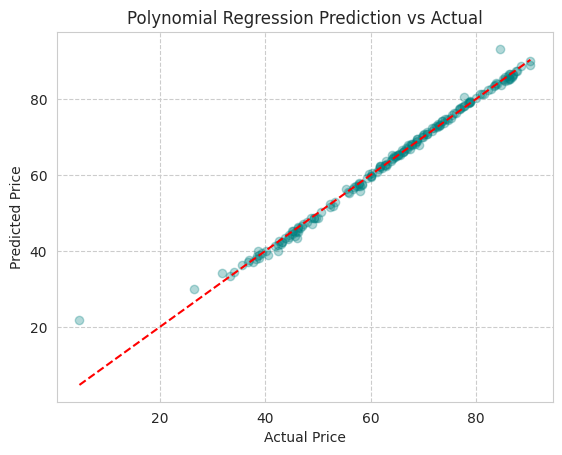

In [ ]:
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"\n🔧 Polynomial Regression (degree={degree})")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R^2 Score: {r2_poly:.4f}")

# Optional: Scatter plot of predicted vs actual
plt.scatter(y_test, y_poly_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression Prediction vs Actual")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 4
poly_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)


🔧 Polynomial Regression (degree=4)
Mean Squared Error: 246.5350
R^2 Score: 0.0475


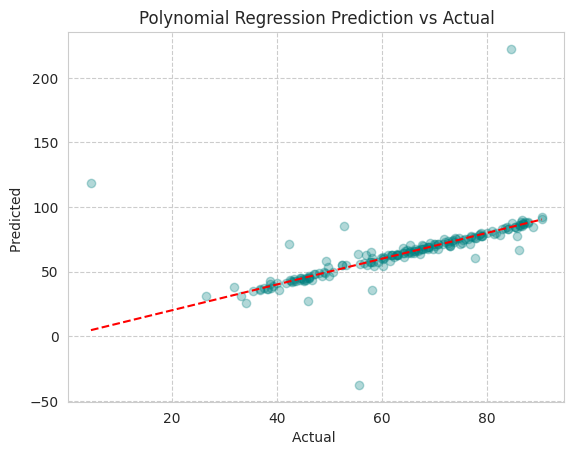

In [ ]:
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"\n🔧 Polynomial Regression (degree={degree})")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R^2 Score: {r2_poly:.4f}")

# Optional: Scatter plot of predicted vs actual
plt.scatter(y_test, y_poly_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Polynomial Regression Prediction vs Actual")
plt.grid(True)
plt.show()